In [1]:
# Advantages of PCA 
# 1) Dimension Reduction
# 2) Preventing Overfitting
# 3) Removes Multicollinearity 
# 4) Model Execution Time Reduces 
# 5) Feature Extraction --> Transforming features into principal components 


### Every principal component is made from every feature combination!!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### PCA - Used to reduce dimensions - Unsupervised learning
<pre>
1) Standardize the dataset.
2) Compute Covaraince Matrix from the Standardized dataset.
3) Compute Eigen values and eigen vectors from the Covaraince Matrix.
Arrange Eigen Vectors in decreasing order of Eigen values.

4) Select Feature matrix which is min number of eigen vectors required to generate the principal components.
5) Generate Pcincipal Components from the Feature matrix

PCs = np.dot(std_org_dataset, Eig_vect.T)
</pre>

#### Read the dataset

In [3]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

#### Data Preprocessing

#### Handle Null Values

In [5]:
def fetch_null_val(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Null_Count':nv.values,
                         '%Null':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('%Null',ascending=False)
    return nv_df

In [6]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


In [7]:
df1 = df.copy()

In [8]:
cols = ['PoolQC','MiscFeature','Alley','Fence']
for i in cols:
    print(i,df[i].unique())

PoolQC [nan 'Ex' 'Fa' 'Gd']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley [nan 'Grvl' 'Pave']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [9]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [10]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
1,MasVnrType,872,59.726027
9,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
10,GarageType,81,5.547945
11,GarageYrBlt,81,5.547945
12,GarageFinish,81,5.547945
13,GarageQual,81,5.547945
14,GarageCond,81,5.547945
5,BsmtExposure,38,2.602740
7,BsmtFinType2,38,2.602740


In [11]:
nv_df['Feature'].values

array(['MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'MasVnrArea', 'Electrical'], dtype=object)

#### Basement related Features

In [12]:
cols = ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    print(i,df[i].unique())

BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


In [13]:
cols = ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    df[i] = df[i].fillna('No Basement')

#### Garege Related Faetures

In [14]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']  #  'GarageYrBlt'
for i in cols:
    print(i,df[i].unique())

GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [15]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']
for i in cols:
    df[i] = df[i].fillna('No Garage')

In [16]:
cols = ['LotFrontage','MasVnrArea']
for i in cols:
    print(df[i].value_counts())

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64


In [17]:
cols = ['LotFrontage','MasVnrArea']
for i in cols:
    df[i] = df[i].fillna(df[i].median())

In [18]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
0,MasVnrType,872,59.726027
2,FireplaceQu,690,47.260274
3,GarageYrBlt,81,5.547945
1,Electrical,1,0.068493


In [19]:
df['MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [20]:
df['GarageYrBlt'].nunique()

97

In [21]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

# df['GarageYrBlt'].mode()[0] or df['GarageYrBlt'].mode().max()

In [22]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [23]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [24]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
0,MasVnrType,872,59.726027
1,Electrical,1,0.068493


In [25]:
df['MasVnrType'] = df['MasVnrType'].fillna('Others')

In [26]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
0,Electrical,1,0.068493


In [27]:
df.dropna(inplace = True)

In [28]:
df.shape

(1459, 77)

In [29]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null


#### Duplicates

In [30]:
df.duplicated().sum()

0

In [31]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [32]:
df.drop('Id',axis=1,inplace=True)

In [33]:
df.shape

(1459, 76)

In [34]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

### EDA

In [35]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'Ga

In [36]:
len(cat_cols)

39

#### Univariate - CountPlot

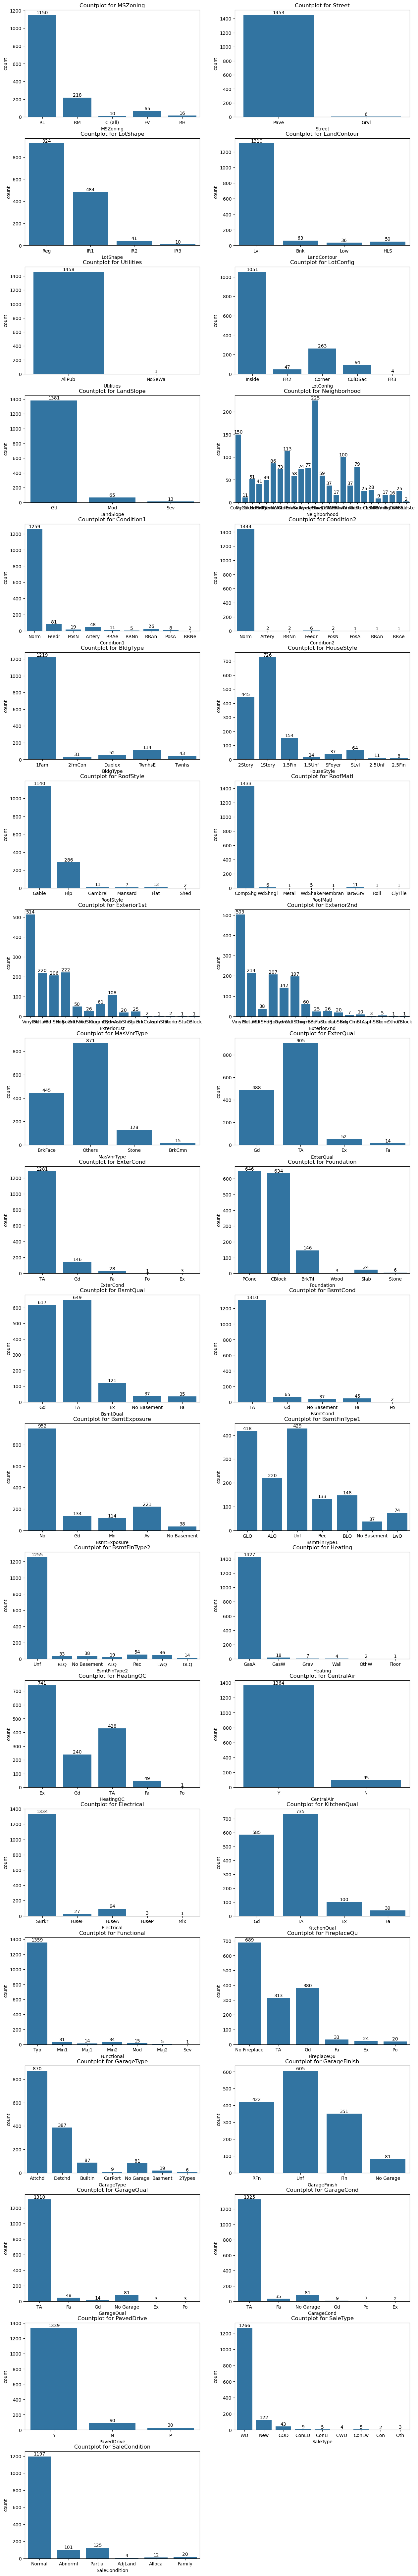

In [37]:
plt.figure(figsize=(15,100))
for i in range(len(cat_cols)):
    plt.subplot(20,2, i+1)
    ax = sns.countplot(x = df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

In [38]:
cols_to_drop = ['Street', 'Utilities', 'LandSlope', 'Condition2',
                'RoofMatl', 'Heating',  'Functional']

In [39]:
df.drop(cols_to_drop, axis = 1 , inplace = True)
df.shape

(1459, 69)

##### Bivariate - Numerical vs Numerical

In [40]:
cols = num_cols[:-1]
print(cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


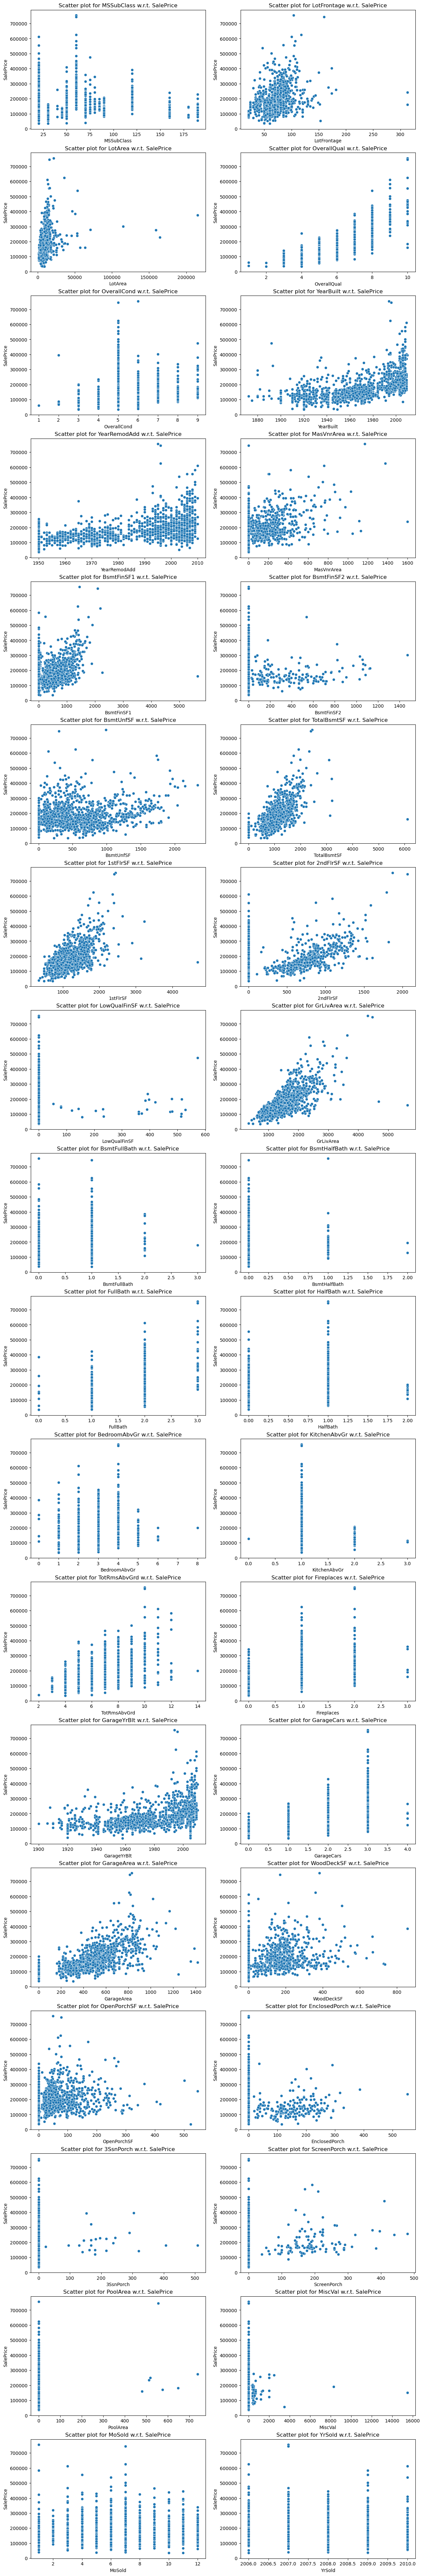

In [41]:
plt.figure(figsize=(15,100))
for i in range(len(cols)):
    plt.subplot(18,2, i+1)
    sns.scatterplot(x = df[cols[i]], y = df['SalePrice'])
    plt.title(f'Scatter plot for {cols[i]} w.r.t. SalePrice')
plt.show()

In [42]:
cols_to_drop_num = ['PoolArea', 'MiscVal', 'LowQualFinSF', '3SsnPorch']
df.drop(cols_to_drop_num, axis = 1, inplace = True)

In [43]:
df.shape

(1459, 65)

In [44]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'M

#### Correlation

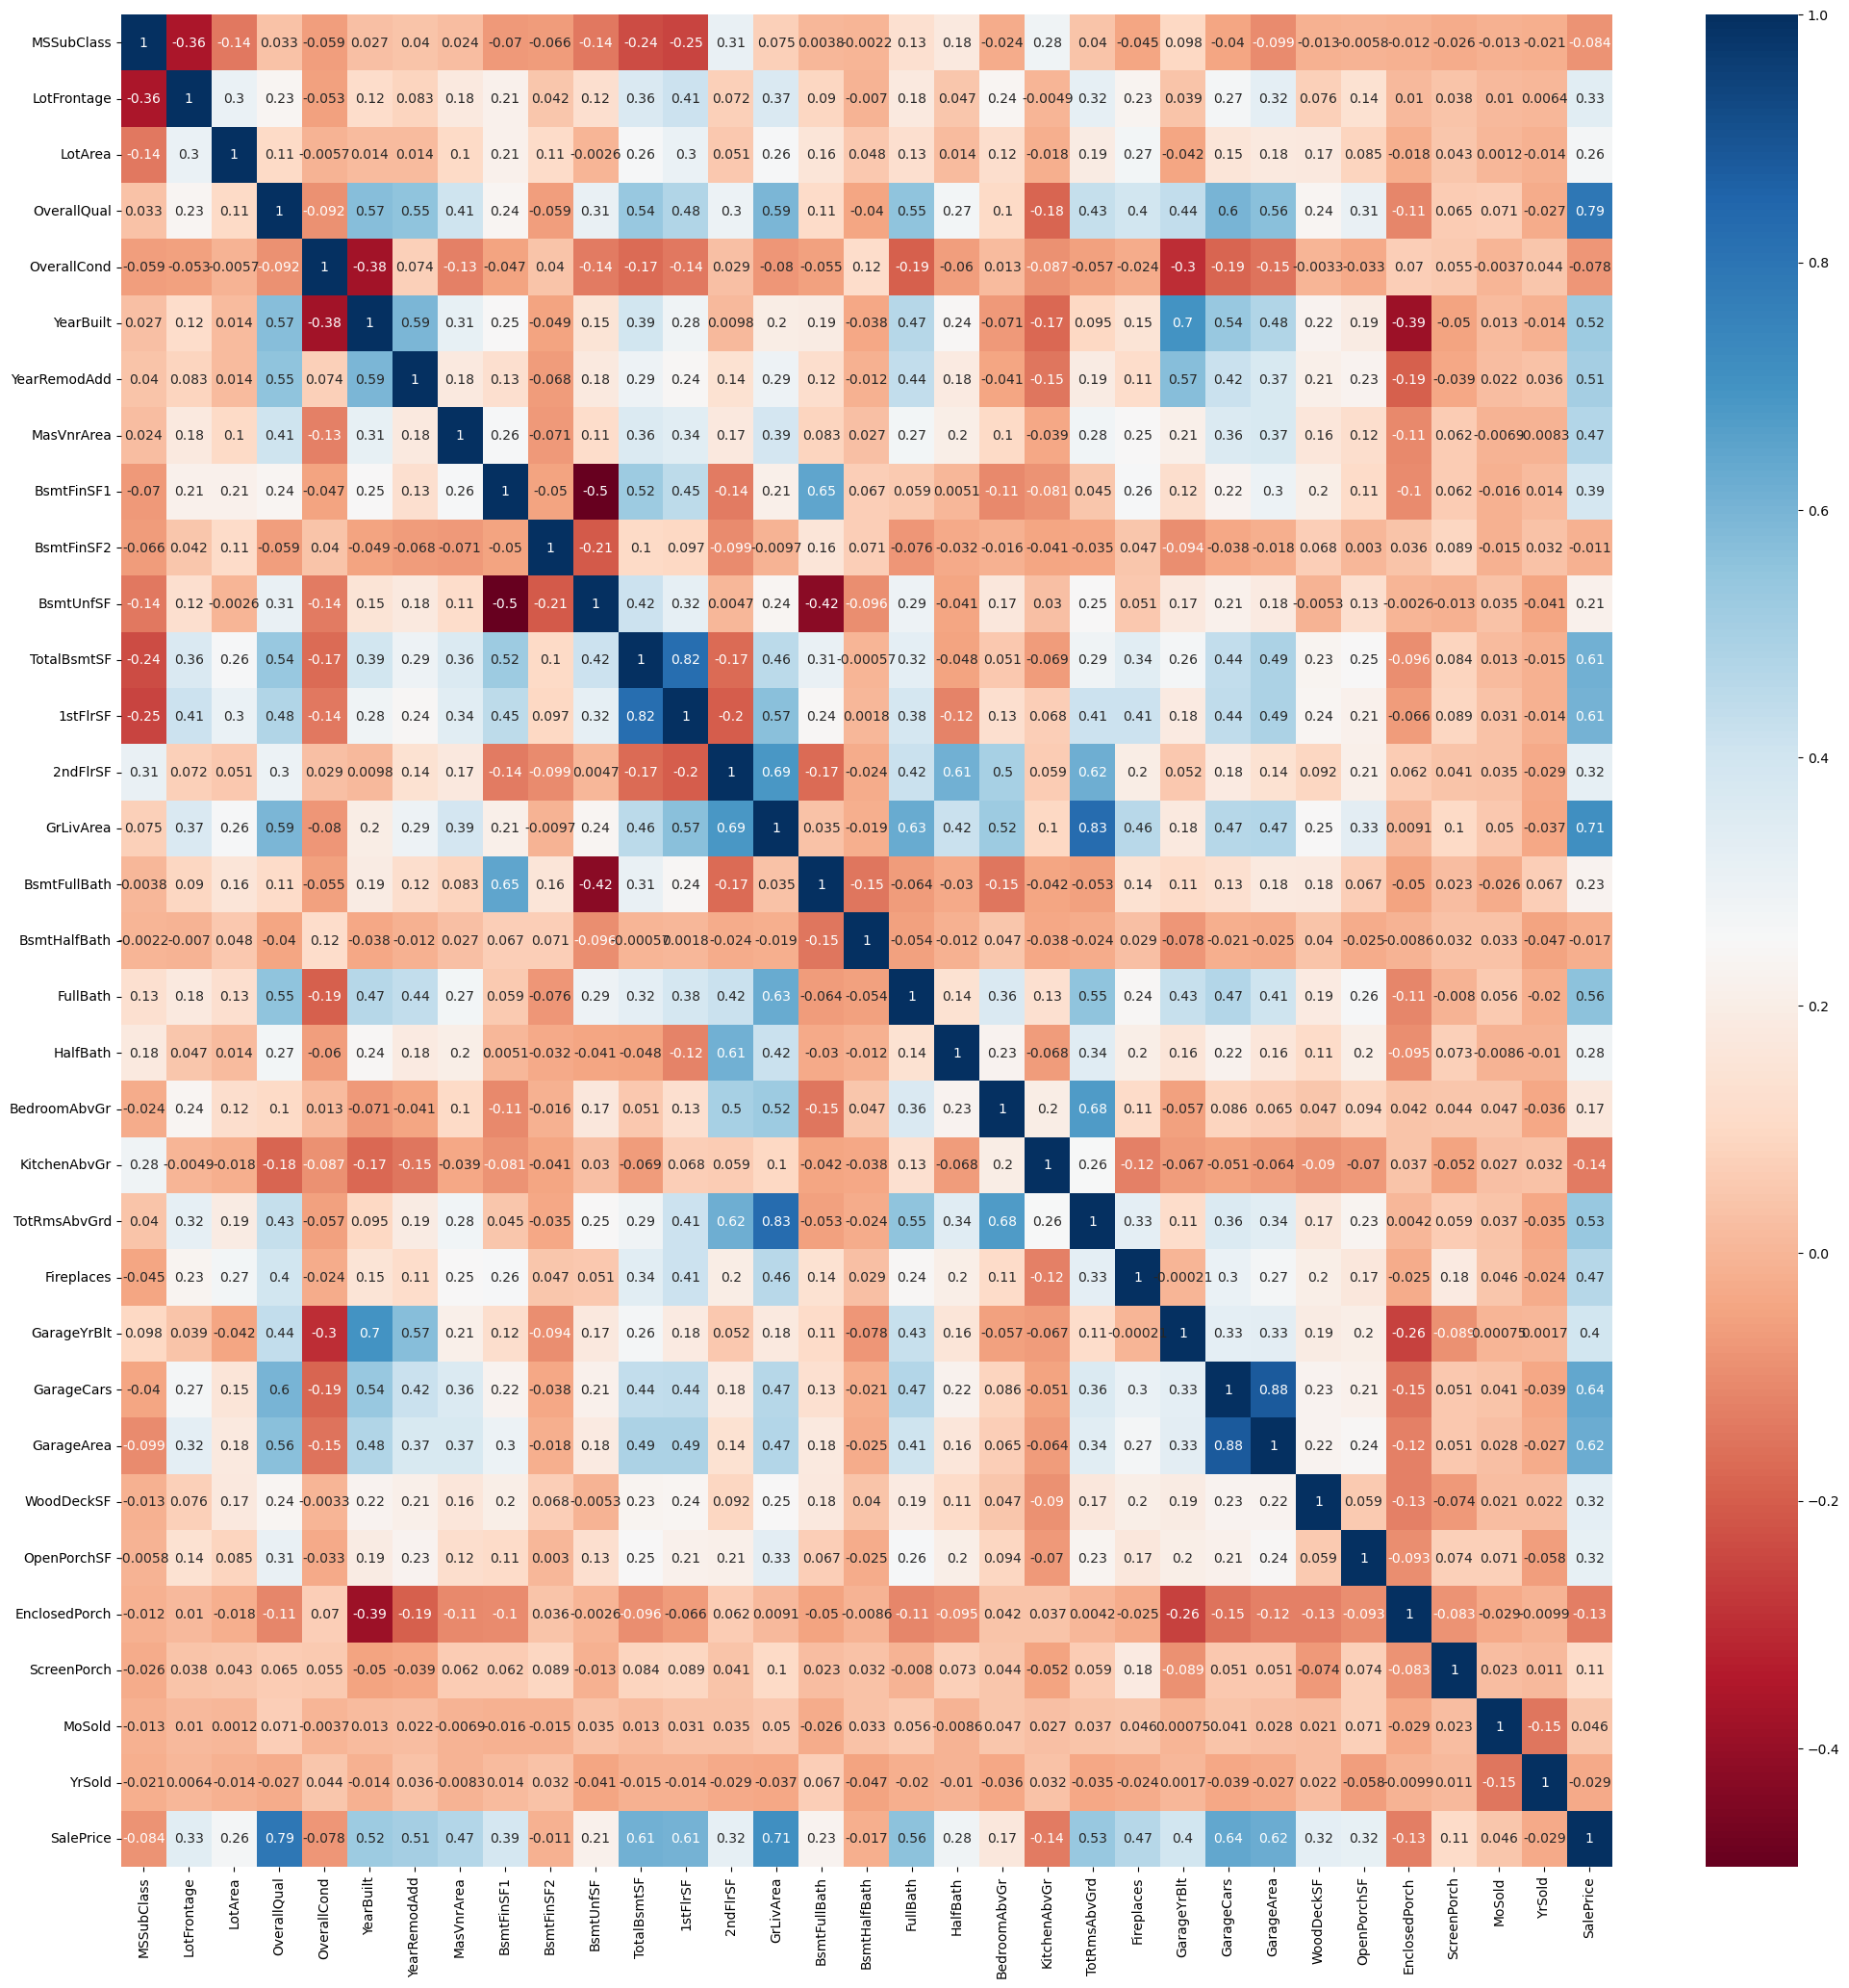

In [50]:
corr = df[num_cols].corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True, cmap = 'RdBu')
plt.show()

#### Outlier Treatment

In [52]:
len(num_cols)

33

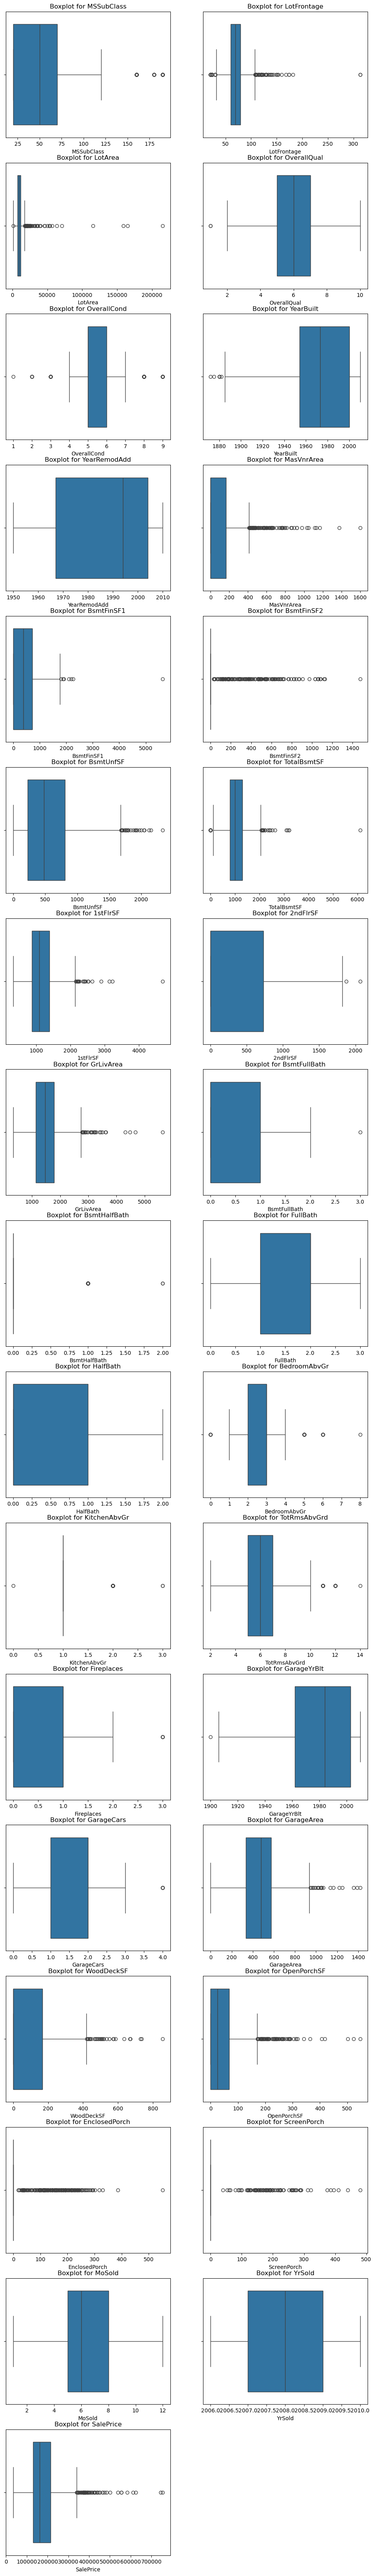

In [53]:
plt.figure(figsize=(12,85))
for i in range(len(num_cols)):
    plt.subplot(17,2, i+1)
    sns.boxplot(x = df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

In [58]:
print(df.shape)
print(df[df['BsmtFinSF2']==0].shape)
print(df[df['BsmtHalfBath']==0].shape)
print(df[df['EnclosedPorch']==0].shape)
print(df[df['ScreenPorch']==0].shape)

(1459, 65)
(1292, 65)
(1377, 65)
(1251, 65)
(1343, 65)


In [59]:
num_cols_to_drop = ['BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'ScreenPorch']

df.drop(num_cols_to_drop, axis = 1, inplace = True)

In [60]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [61]:
df.shape

(1459, 61)

In [70]:
a1 = df[num_cols].describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, 0.95, 0.96, 0.97, 0.98, 0.99]).T
a1 = a1.iloc[:, 3:]
a1

,min,1%,2%,3%,4%,5%,50%,95%,96%,97%,98%,99%,max
MSSubClass,20.00,20.0000,20.00,20.00,20.00,20.0,50.0,160.0,160.00,160.00,188.40,190.0000,190.00
LotFrontage,21.00,21.0000,24.00,30.00,34.00,35.9,69.0,104.0,107.00,114.00,120.84,137.1764,137.42
LotArea,1680.00,1680.0000,2123.88,2522.00,3092.48,3307.4,9477.0,17402.3,18861.20,21576.60,25255.44,36959.3456,37593.68
OverallQual,1.00,3.0000,4.00,4.00,4.00,4.0,6.0,8.0,9.00,9.00,9.00,10.0000,10.00
OverallCond,1.00,3.0000,3.00,4.00,4.00,4.0,5.0,8.0,8.00,8.00,8.00,9.0000,9.00
YearBuilt,1872.00,1899.1600,1908.32,1910.00,1914.32,1916.0,1973.0,2007.0,2007.00,2007.00,2008.00,2009.0000,2010.00
YearRemodAdd,1950.00,1950.0000,1950.00,1950.00,1950.00,1950.0,1994.0,2007.0,2008.00,2008.00,2008.00,2009.0000,2010.00
MasVnrArea,0.00,0.0000,0.00,0.00,0.00,0.0,0.0,456.0,487.80,573.78,650.84,789.4112,791.36
BsmtFinSF1,0.00,0.0000,0.00,0.00,0.00,0.0,384.0,1274.0,1309.00,1376.38,1442.68,1572.1764,1572.42
BsmtUnfSF,0.00,0.0000,0.00,0.00,0.00,0.0,479.0,1468.0,1523.84,1589.56,1678.40,1795.8820,1797.10


In [64]:
left_sk_cols = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

right_sk_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'SalePrice', 'BedroomAbvGr']

In [65]:
df1 = df.copy()

In [67]:
for i in left_sk_cols:
    lower = np.quantile(df[i],0.01)
    df[i] = np.where(df[i]< lower, lower, df[i])

In [69]:
for i in right_sk_cols:
    upper = np.quantile(df[i],0.99)
    df[i] = np.where(df[i]> upper, upper, df[i])

In [71]:
a1 = df[num_cols].describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, 0.95, 0.96, 0.97, 0.98, 0.99]).T
a1 = a1.iloc[:, 3:]
a1

,min,1%,2%,3%,4%,5%,50%,95%,96%,97%,98%,99%,max
MSSubClass,20.00,20.0000,20.00,20.00,20.00,20.0,50.0,160.0,160.00,160.00,188.40,190.0000,190.00
LotFrontage,21.00,21.0000,24.00,30.00,34.00,35.9,69.0,104.0,107.00,114.00,120.84,137.1764,137.42
LotArea,1680.00,1680.0000,2123.88,2522.00,3092.48,3307.4,9477.0,17402.3,18861.20,21576.60,25255.44,36959.3456,37593.68
OverallQual,1.00,3.0000,4.00,4.00,4.00,4.0,6.0,8.0,9.00,9.00,9.00,10.0000,10.00
OverallCond,1.00,3.0000,3.00,4.00,4.00,4.0,5.0,8.0,8.00,8.00,8.00,9.0000,9.00
YearBuilt,1872.00,1899.1600,1908.32,1910.00,1914.32,1916.0,1973.0,2007.0,2007.00,2007.00,2008.00,2009.0000,2010.00
YearRemodAdd,1950.00,1950.0000,1950.00,1950.00,1950.00,1950.0,1994.0,2007.0,2008.00,2008.00,2008.00,2009.0000,2010.00
MasVnrArea,0.00,0.0000,0.00,0.00,0.00,0.0,0.0,456.0,487.80,573.78,650.84,789.4112,791.36
BsmtFinSF1,0.00,0.0000,0.00,0.00,0.00,0.0,384.0,1274.0,1309.00,1376.38,1442.68,1572.1764,1572.42
BsmtUnfSF,0.00,0.0000,0.00,0.00,0.00,0.0,479.0,1468.0,1523.84,1589.56,1678.40,1795.8820,1797.10


#### Encoding

In [73]:
cat_cols

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [74]:
for i in cat_cols:
    print(i, df[i].nunique())

MSZoning 5
LotShape 4
LandContour 4
LotConfig 5
Neighborhood 25
Condition1 9
BldgType 5
HouseStyle 8
RoofStyle 6
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
SaleType 9
SaleCondition 6


In [83]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

In [84]:
df['ExterCond'].value_counts()
# {Po:0, FA:1, TA:2, Gd:3, Ex:4}  Ideal Order [However Ordering woud be alphabetic] 

ExterCond
TA    1281
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [85]:
cols_to_encode = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']
print(len(cols_to_encode))
df.shape

29


(1459, 61)

In [87]:
df_dum = pd.get_dummies(data=df, columns = cols_to_encode, 
                       drop_first = True, dtype=int)
print(df_dum.columns)
print(df_dum.shape)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=160)
(1459, 160)


#### Select X and Y

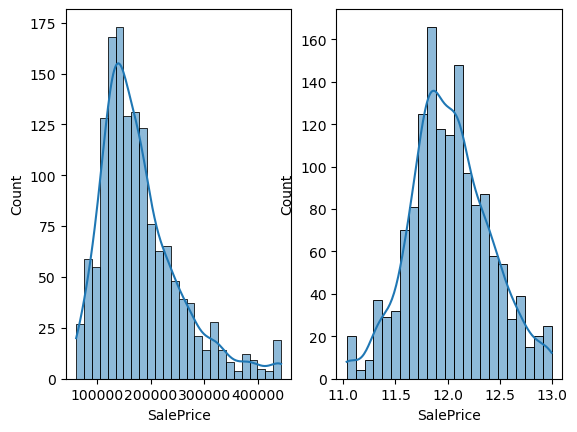

In [92]:
plt.subplot(1,2,1)
sns.histplot(df['SalePrice'], kde =True)
plt.subplot(1,2,2)
sns.histplot(np.log(df['SalePrice']), kde = True)
plt.show()

In [93]:
x = df_dum.drop(['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'], axis=1)
y = np.log(df_dum['SalePrice'])
print(x.shape)
print(y.shape)

(1459, 156)
(1459,)


#### Split Data into Train and Test

In [95]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                    random_state = 37)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1021, 156) (438, 156)
(1021,) (438,)


In [129]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

In [159]:
def eval_model(ypred):
    mae = mean_absolute_error(y_test, ypred)
    mse = mean_squared_error(y_test, ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ypred)
    print('MAE', mae, 'MSE', mse, 'RMSE', rmse, 'R2_Score', r2)

#### Linear Regression Before PCA

In [131]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

LinearRegression()

In [160]:
ypred_lr1 = lr1.predict(x_test)
eval_model(ypred_lr1)

MAE 0.0922394132915038 MSE 0.01648686085242885 RMSE 0.1284011715383814 R2_Score 0.8760209833855555


In [133]:
print('Train_Score', lr1.score(x_train, y_train))
print('Test_Score', lr1.score(x_test, y_test))

Train_Score 0.9261165464666875
Test_Score 0.8760209833855555


#### PCA

In [135]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [136]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
print(x_train_sc.shape)
print(x_test_sc.shape)

(1021, 156)
(438, 156)


In [167]:
pca = PCA()

pcomps_train = pca.fit_transform(x_train_sc)
pcomps_test = pca.transform(x_test_sc)
print(pcomps_train.shape)
print(pcomps_test.shape)

(1021, 156)
(438, 156)


#### Compute Eigen Value and Eigen Vector

In [168]:
eig_val = pca.explained_variance_
eig_vec = pca.components_

In [169]:
eig_data_df = pd.DataFrame({'EV':eig_val})
eig_data_df['Var_EV'] = (eig_data_df['EV']/eig_data_df['EV'].sum())*100
eig_data_df['CumSum_Var_EV'] = eig_data_df['Var_EV'].cumsum()
eig_data_df.head(10)

,EV,Var_EV,CumSum_Var_EV
0,15.372494,9.844512,9.844512
1,6.998554,4.481858,14.326370
2,6.394027,4.094721,18.421091
3,5.552331,3.555701,21.976792
4,5.028326,3.220129,25.196920
5,4.190826,2.683796,27.880716
6,3.319687,2.125920,30.006637
7,3.065188,1.962940,31.969576
8,2.844885,1.821858,33.791434
9,2.620631,1.678246,35.469681


#### Scree Plot

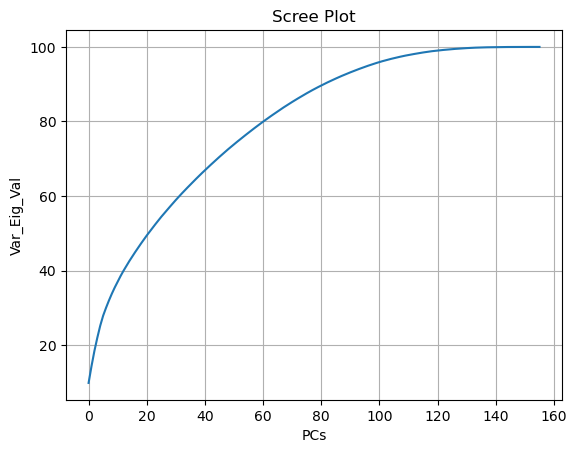

In [170]:
plt.plot(list(range(156)),eig_data_df['CumSum_Var_EV'])
plt.title('Scree Plot')
plt.xlabel('PCs')
plt.ylabel('Var_Eig_Val')
plt.grid()
plt.show()

In [182]:
eig_data_df[eig_data_df['CumSum_Var_EV']>=79]

,EV,Var_EV,CumSum_Var_EV
59,9.157272e-01,5.864297e-01,79.382194
60,8.955003e-01,5.734764e-01,79.955671
61,8.820717e-01,5.648768e-01,80.520547
62,8.647383e-01,5.537765e-01,81.074324
63,8.532390e-01,5.464124e-01,81.620736
...,...,...,...
151,3.031690e-30,1.941488e-30,100.000000
152,6.906397e-32,4.422842e-32,100.000000
153,6.906397e-32,4.422842e-32,100.000000
154,6.906397e-32,4.422842e-32,100.000000


#### Inference
1) Retaining 42 PCs ensures that 75% of the variance is captured

In [183]:
pc_list = ['PC'+str(i) for i in range(156)]

In [184]:
pcomps_train_df = pd.DataFrame(pcomps_train, columns = pc_list)
pcomps_test_df = pd.DataFrame(pcomps_test, columns = pc_list)
print(pcomps_train_df.shape)
print(pcomps_test_df.shape)

(1021, 156)
(438, 156)


In [185]:
pcomps_train_df = pcomps_train_df.iloc[:,:62]
pcomps_test_df = pcomps_test_df.iloc[:,:62]
print(pcomps_train_df.shape)
print(pcomps_test_df.shape)

(1021, 62)
(438, 62)


#### Linear Regression After PCA

In [186]:
lr2 = LinearRegression()

In [187]:
lr2.fit(pcomps_train_df, y_train)
ypred_lr2 = lr2.predict(pcomps_test_df)
eval_model(ypred_lr2)

MAE 0.10063513742056875 MSE 0.01790609751320731 RMSE 0.13381366713907555 R2_Score 0.8653485110985972


In [188]:
print('Train_Score', lr2.score(pcomps_train_df, y_train))
print('Test_Score', lr2.score(pcomps_test_df, y_test))

Train_Score 0.8795840662268116
Test_Score 0.8653485110985972
